In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('train.csv')


%matplotlib inline
#df.info()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [98]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [99]:
# check to null values 
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [100]:
# Data cleaning

#Delete a column with Null values
newdf = df.drop(['Postal Code'], axis=1, inplace=True)


In [101]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(1), int64(1), object(15)
memory usage: 1.

In [102]:
# Delete unnecessary columns

newdf1 = df.drop(['Sub-Category'], axis=1, inplace=True)
newdf3 = df.drop(['Region'], axis=1, inplace=True)
newdf4 = df.drop(['State'], axis=1, inplace=True)
newdf5 = df.drop(['Ship Mode'], axis=1, inplace=True)
newdf6 = df.drop(['Ship Date'], axis=1, inplace=True)

In [103]:
df.info()

# remove white space from product name
df['Product Name']=df['Product Name'].str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Customer ID    9800 non-null   object 
 4   Customer Name  9800 non-null   object 
 5   Segment        9800 non-null   object 
 6   Country        9800 non-null   object 
 7   City           9800 non-null   object 
 8   Product ID     9800 non-null   object 
 9   Category       9800 non-null   object 
 10  Product Name   9800 non-null   object 
 11  Sales          9800 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 918.9+ KB


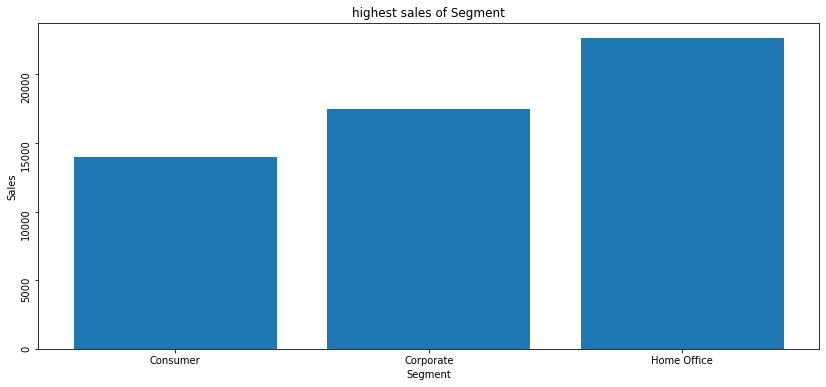

highest sales of Segment is: 22638.48


In [104]:
# Q1: What type of segment has the highest sales?


colors = ['red', 'green', 'blue']
plt.figure(figsize=[14, 6])
plt.bar( df.Segment, df.Sales);
plt.yticks(rotation = 90);
plt.title('highest sales of Segment')
plt.xlabel('Segment')
plt.ylabel('Sales');
plt.show()
# Home Office
print("highest sales of Segment is:",df.Sales.max())

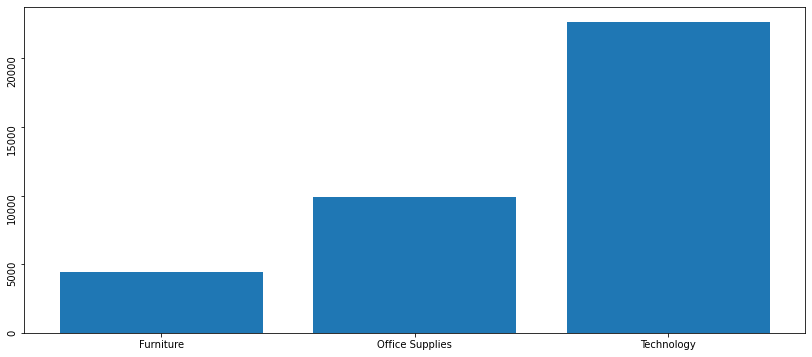

highest sales of Category is: Technology


In [105]:
# Q2: What type of Category has the highest sales?

plt.figure(figsize=[14, 6])
plt.bar( df.Category, df.Sales);
plt.yticks(rotation = 90);
plt.show()
# Technology
print("highest sales of Category is: Technology")

In [106]:
#Q3 What is the average of sales ?
df.describe()
#230.769059


,Row ID,Sales
count,9800.000000,9800.000000
mean,4900.500000,230.769059
std,2829.160653,626.651875
min,1.000000,0.444000
25%,2450.750000,17.248000
50%,4900.500000,54.490000
75%,7350.250000,210.605000
max,9800.000000,22638.480000


In [107]:
df['Product Name'].unique()
df['Product Name'].nunique() # 1849 value
df['Product Name'].value_counts() # I will take Top 5

Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staple remover                                               18
                                                             ..
Vtech AT&T CL2940 Corded Speakerphone, Black                  1
Logitech Illuminated Ultrathin Keyboard with Backlighting     1
Hewlett-Packard Deskjet 5550 Printer                          1
Xerox 1989                                                    1
Plantronics Single Ear Headset                                1
Name: Product Name, Length: 1849, dtype: int64

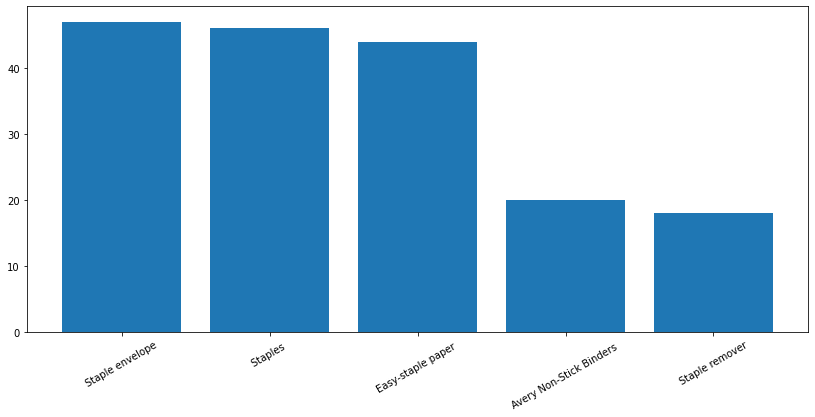

highest sales of Category is: Technology


In [108]:
# Q4-What product sold the most form top 5? 

data = {'Product Name':['Staple envelope','Staples ','Easy-staple paper ','Avery Non-Stick Binders ','Staple remover'],
       'Sales':[47,46,44,20,18]}
df1_x= pd.DataFrame(data)
df1_x

plt.figure(figsize=[14, 6])
plt.bar(df1_x['Product Name'], df1_x.Sales);
plt.xticks(rotation = 30);
plt.show()
# Staple envelope
print("highest sales of Category is: Technology")

In [109]:
df.head()

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Country,City,Product ID,Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680


In [110]:
df['City'].nunique() # 529 value

529

In [111]:
df['City'].unique() 

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [112]:
df['City'].value_counts() # I will take Top 5

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
Danbury            1
Champaign          1
Antioch            1
Jupiter            1
Romeoville         1
Name: City, Length: 529, dtype: int64

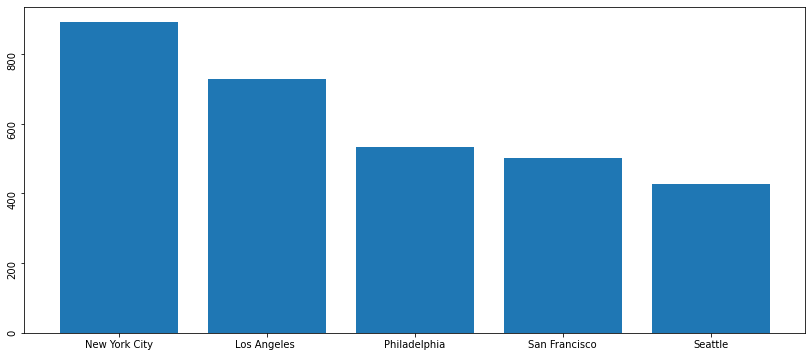

In [113]:

# Q5- Which city has the highest sales out of the 5 cities with the highest sales?

data = {'City':['New York City','Los Angeles ','Philadelphia','San Francisco','Seattle'],
       'Sales':[891,728,532,500,426]}
df_x= pd.DataFrame(data)
df_x

plt.figure(figsize=[14, 6])
plt.bar( df_x.City, df_x.Sales);
plt.yticks(rotation = 90);

plt.show()
# New York City

In [114]:


df['year'] = pd.DatetimeIndex(df['Order Date']).year
df['month'] = pd.DatetimeIndex(df['Order Date']).month
df.head(5)


,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Country,City,Product ID,Category,Product Name,Sales,year,month
0,1,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,2017,8
1,2,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8
2,3,CA-2017-138688,12/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12
3,4,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11
4,5,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2016,11


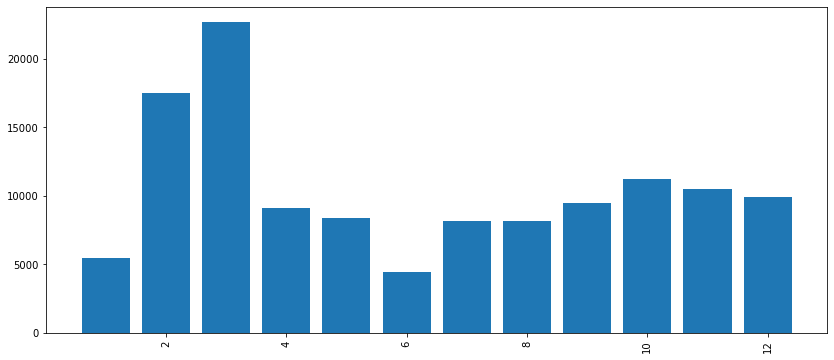

In [115]:
#Q6- which month is the highest sales?

plt.figure(figsize=[14, 6])
plt.bar( df.month, df.Sales);
plt.xticks(rotation = 90);
# len spac


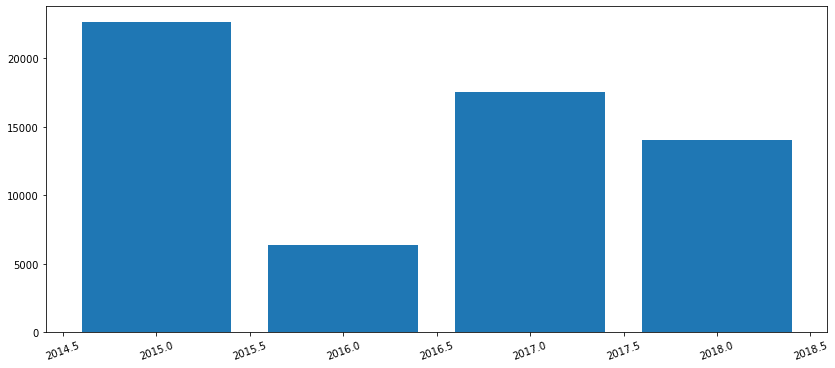

In [116]:
#Q7- which month is the highest sales?
plt.figure(figsize=[14, 6])
plt.bar( df.year, df.Sales);
plt.xticks(rotation = 20);




In [117]:
df['year'].unique() 

array([2017, 2016, 2015, 2018], dtype=int64)